# The Probability Density Function - Lab

## Introduction
In this lab, we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to:

* Plot and interpret density plots and comment on the shape of the plot
* Estimate probabilities for continuous variables by using interpolation 


## Let's get started

Let's import the necessary libraries for this lab.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
# plt.style.use('ggplot')
import pandas as pd
import seaborn as sns

## Import the data, and calculate the mean and the standard deviation

- Import the dataset 'weight-height.csv' as a pandas dataframe.

- Next, calculate the mean and standard deviation for weights and heights for men and women individually. You can simply use the pandas `.mean()` and `.std()` to do so.

**Hint**: Use your pandas dataframe subsetting skills like `loc()`, `iloc()`, and `groupby()`

In [2]:
data = pd.read_csv('weight-height.csv')

In [3]:
data.shape

(10000, 3)

In [4]:
data.head(3)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856


In [6]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

**OPTION 1**

In [7]:
grouped = data.groupby('Gender')

# Calculate the mean and standard deviation for weights and heights for each gender
mean_values = grouped[['Weight', 'Height']].mean()
std_values = grouped[['Weight', 'Height']].std()

print("Mean values:")
print(mean_values)

print("\nStandard deviation values:")
print(std_values)

Mean values:
            Weight     Height
Gender                       
Female  135.860093  63.708774
Male    187.020621  69.026346

Standard deviation values:
           Weight    Height
Gender                     
Female  19.022468  2.696284
Male    19.781155  2.863362


**OPTION TWO**

In [8]:


male_df = data.loc[data['Gender'] == 'Male']
female_df = data.loc[data['Gender'] == 'Female']  

# Calculate mean and standard deviation for weights and heights for males
male_mean_weight = male_df['Weight'].mean()
male_std_weight = male_df['Weight'].std()
male_mean_height = male_df['Height'].mean()
male_std_height = male_df['Height'].std()

# Calculate mean and standard deviation for weights and heights for females
female_mean_weight = female_df['Weight'].mean()
female_std_weight = female_df['Weight'].std()
female_mean_height = female_df['Height'].mean()
female_std_height = female_df['Height'].std()

# Print the results
print("Male statistics:")
print(f"Mean weight: {male_mean_weight:.2f}, Std weight: {male_std_weight:.2f}")
print(f"Mean height: {male_mean_height:.2f}, Std height: {male_std_height:.2f}")

print("\nFemale statistics:")
print(f"Mean weight: {female_mean_weight:.2f}, Std weight: {female_std_weight:.2f}")
print(f"Mean height: {female_mean_height:.2f}, Std height: {female_std_height:.2f}")
# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

Male statistics:
Mean weight: 187.02, Std weight: 19.78
Mean height: 69.03, Std height: 2.86

Female statistics:
Mean weight: 135.86, Std weight: 19.02
Mean height: 63.71, Std height: 2.70


## Plot histograms (with densities on the y-axis) for male and female heights 

- Make sure to create overlapping plots
- Use binsize = 10, set alpha level so that overlap can be visualized

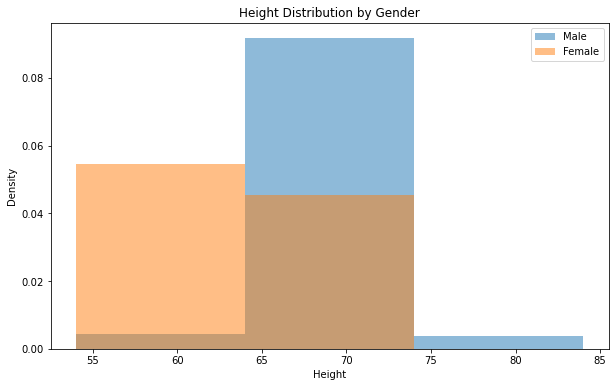

In [9]:
# Your code here

# Plot histograms for male and female heights
plt.figure(figsize=(10, 6))

# Histogram for male heights
plt.hist(male_df['Height'], bins=range(int(data['Height'].min()), int(data['Height'].max()) + 10, 10),
         alpha=0.5, density=True, label='Male')

# Histogram for female heights
plt.hist(female_df['Height'], bins=range(int(data['Height'].min()), int(data['Height'].max()) + 10, 10),
         alpha=0.5, density=True, label='Female')

# Add title and labels
plt.title('Height Distribution by Gender')
plt.xlabel('Height')
plt.ylabel('Density')
plt.legend(loc='upper right')

# Show the plot
plt.show()

In [10]:
# Record your observations - are these inline with your personal observations?

# Men tend to have higher values of heights in general than female
# The most common region for male and female heights is between 65 - 67 inches (about 5 and a half feet)
# Male heights have a slightly higher spread than female heights, hence the male height peak is slightly smaller than female height
# Both heights are normally distributed

## Create a density function using interpolation


- Write a density function density() that uses interpolation and takes in a random variable
- Use `np.histogram()`
- The function should return two lists carrying x and y coordinates for plotting the density function

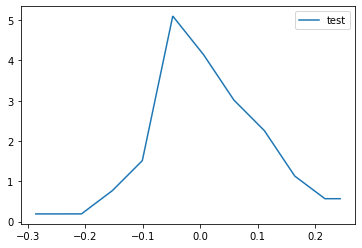

In [12]:
def density(x, bins=10):
    # Calculate the histogram
    counts, bin_edges = np.histogram(x, bins=bins, density=True)
    
    # Calculate the bin centers
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    # Interpolate to get the x and y coordinates
    x_interp = np.linspace(bin_edges[0], bin_edges[-1], 1000)
    y_interp = np.interp(x_interp, bin_centers, counts)
    
    return x_interp, y_interp


# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()

## Add overlapping density plots to the histograms plotted earlier

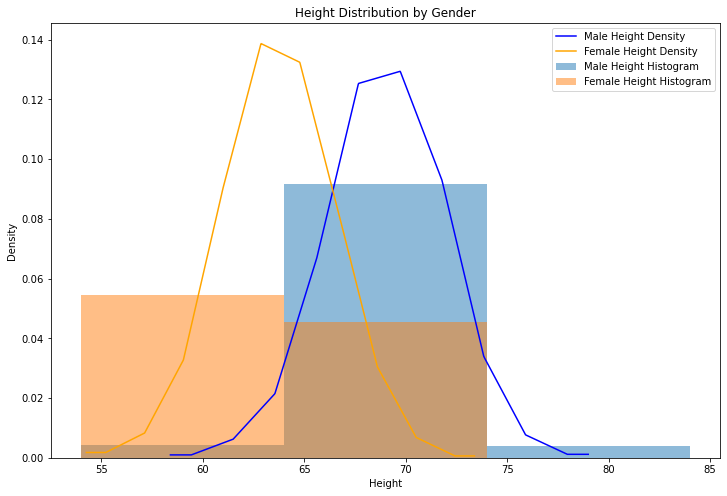

In [13]:
# Your code here 
# Plot histograms for male and female heights
plt.figure(figsize=(12, 8))

# Histogram for male heights
plt.hist(male_df['Height'], bins=range(int(data['Height'].min()), int(data['Height'].max()) + 10, 10),
         alpha=0.5, density=True, label='Male Height Histogram')

# Histogram for female heights
plt.hist(female_df['Height'], bins=range(int(data['Height'].min()), int(data['Height'].max()) + 10, 10),
         alpha=0.5, density=True, label='Female Height Histogram')

# Calculate and plot density for male heights
x_male, y_male = density(male_df['Height'], bins=10)
plt.plot(x_male, y_male, label='Male Height Density', color='blue')

# Calculate and plot density for female heights
x_female, y_female = density(female_df['Height'], bins=10)
plt.plot(x_female, y_female, label='Female Height Density', color='orange')

# Add title and labels
plt.title('Height Distribution by Gender')
plt.xlabel('Height')
plt.ylabel('Density')
plt.legend(loc='upper right')

# Show the plot
plt.show()

## Repeat the above exercise for male and female weights

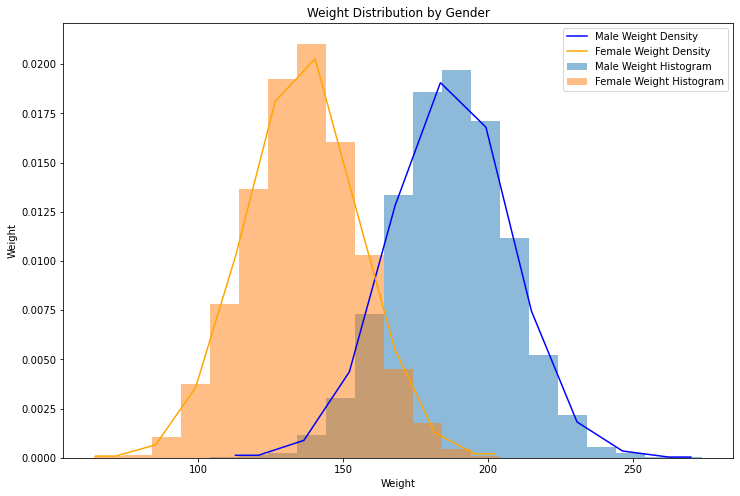

In [14]:
# Your code here 

# Your code here 
# Plot histograms for male and female heights
plt.figure(figsize=(12, 8))

# Histogram for male heights
plt.hist(male_df['Weight'], bins=range(int(data['Weight'].min()), int(data['Weight'].max()) + 10, 10),
         alpha=0.5, density=True, label='Male Weight Histogram')

# Histogram for female heights
plt.hist(female_df['Weight'], bins=range(int(data['Weight'].min()), int(data['Weight'].max()) + 10, 10),
         alpha=0.5, density=True, label='Female Weight Histogram')

# Calculate and plot density for male heights
x_male, y_male = density(male_df['Weight'], bins=10)
plt.plot(x_male, y_male, label='Male Weight Density', color='blue')

# Calculate and plot density for female heights
x_female, y_female = density(female_df['Weight'], bins=10)
plt.plot(x_female, y_female, label='Female Weight Density', color='orange')

# Add title and labels
plt.title('Weight Distribution by Gender')
plt.xlabel('Weight')
plt.ylabel('Weight')
plt.legend(loc='upper right')

# Show the plot
plt.show()

## Write your observations in the cell below

In [15]:
# Record your observations - are these inline with your personal observations?

# The patterns and overlap are highly similar to what we see with height distributions
# Men generally are heavier than women
# The common region for common weights is around 160 lbs. 
# Male weight has slightly higher spread than female weight (i.e. more variation)
# Most females are around 130-140 lbs whereas most men are around 180 pounds.

#Takeaway

# Weight is more suitable to distinguish between males and females than height

## Repeat the above experiments in seaborn and compare with your results

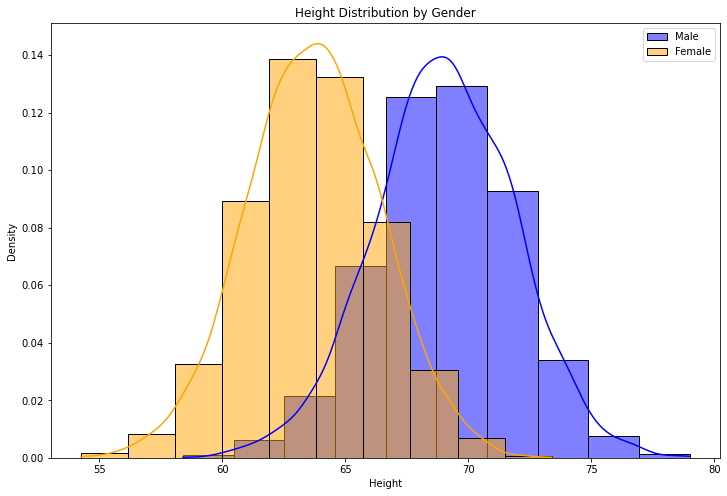

In [17]:
# Code for heights here

# Plot histograms with density plots using Seaborn
plt.figure(figsize=(12, 8))

# Histogram and density plot for male heights
sns.histplot(male_df['Height'], bins=10, kde=True, color='blue', label='Male', alpha=0.5, stat='density')

# Histogram and density plot for female heights
sns.histplot(female_df['Height'], bins=10, kde=True, color='orange', label='Female', alpha=0.5, stat='density')

# Add title and labels
plt.title('Height Distribution by Gender')
plt.xlabel('Height')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.show()

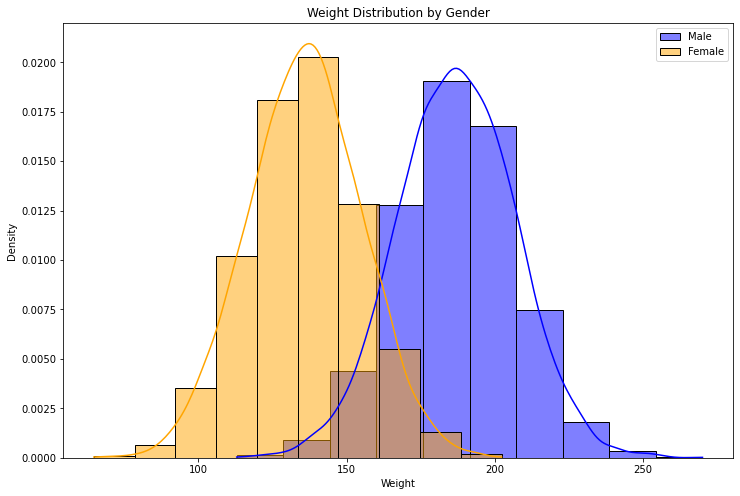

In [18]:
# Plot histograms with density plots using Seaborn
plt.figure(figsize=(12, 8))

# Histogram and density plot for male heights
sns.histplot(male_df['Weight'], bins=10, kde=True, color='blue', label='Male', alpha=0.5, stat='density')

# Histogram and density plot for female heights
sns.histplot(female_df['Weight'], bins=10, kde=True, color='orange', label='Female', alpha=0.5, stat='density')

# Add title and labels
plt.title('Weight Distribution by Gender')
plt.xlabel('Weight')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.show()

In [ ]:
# Code for weights here

In [19]:
# Your comments on the two approaches here. 
# are they similar? what makes them different if they are?

#The observation is similar. But the seaborn plots are easier to interpret and clear.

In [20]:
# Well, what do you think? Overlapping or side to side (or rather top/bottom)

## Summary

In this lesson, you learned how to build the probability density curves visually for a given dataset and compare the distributions visually by looking at the spread, center, and overlap. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.